In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

#Import libraries 

# Pandas is for holding the text in a dataframe
import pandas as pd

# Matplotlib and seaborn package is for plotting of visualisations
import matplotlib.pyplot as plt
import seaborn as sns

# Numpy is for numerical processing usage
import numpy as np

# request is used for pulling data from the internet
import requests, time

# time is used for timing functions
import time, datetime

# import SK learn modules for processing of text and machine learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

# Change setting of pandas to view many items
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500
pd.options.display.max_info_columns = 200
pd.options.display.max_colwidth = 500

# GA-DSIF9 Project 3 Part 1 of 2

# 1. Problem Statement

Ragnarok Online and Maplestory are one of the hottest Massively Multiplayer Online Role-Playing Game (MMORPG) that is the talk of the town right now. Vast majority of the players are primary school children and secondary school adolescent, hence, their discussions on the gaming forums are often not organised by topic and it often frustrates the forum users on what is going on in the threads.

I am a data scientist engaged by Let's Play Game Forums Pte. Ltd. to leverage the classification capabilities of machines learning to classify the forums threads so that the players can have a better idea on what game they are discussing on.

Considering that reddit is already organised by their topics, we will firstly scrape the posts from reddit, and then use natural language processing method to classify them. We will then evaluate the performance of the machine learning model

# 2. Data Collection

In [2]:
# Creating a function which uses the Pushshift, there will be 2 paramaters
# subreddit parameter will specify the subreddit which we will pull data from, in this case it is "RagnarokOnline" and "Maplestory"
# size parameter will specify the amount of post which we will pull

def get_pushshift_data(subreddit, size):
    url = "https://api.pushshift.io/reddit/search/submission/?&subreddit="+str(subreddit)+"&size="+str(size)
    result = requests.get(url)
    print(f"The status code is {result.status_code}")
    posts = result.json()["data"]
    return posts

In [3]:
#Pulling the data and loading data into a dataframe
df_ragnarok = pd.DataFrame(get_pushshift_data("RagnarokOnline", 1000))

The status code is 200


Comment: Status code of 200 means that we had successfully acquired the data

In [4]:
#Check shape of the dataframe
df_ragnarok.shape

(1000, 115)

In [5]:
df_ragnarok.head(1)

,subreddit,selftext,author_fullname,gilded,title,link_flair_richtext,subreddit_name_prefixed,hidden,pwls,link_flair_css_class,thumbnail_height,top_awarded_type,hide_score,quarantine,link_flair_text_color,upvote_ratio,author_flair_background_color,subreddit_type,total_awards_received,media_embed,thumbnail_width,author_flair_template_id,is_original_content,secure_media,is_reddit_media_domain,is_meta,category,secure_media_embed,link_flair_text,score,is_created_from_ads_ui,author_premium,thumbnail,edited,author_flair_css_class,author_flair_richtext,gildings,content_categories,is_self,link_flair_type,wls,removed_by_category,author_flair_type,domain,allow_live_comments,suggested_sort,view_count,archived,no_follow,is_crosspostable,pinned,over_18,all_awardings,awarders,media_only,can_gild,spoiler,locked,author_flair_text,treatment_tags,removed_by,distinguished,subreddit_id,link_flair_background_color,id,is_robot_indexable,author,discussion_type,num_comments,send_replies,whitelist_status,contest_mode,author_patreon_flair,author_flair_text_color,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video,retrieved_utc,updated_utc,utc_datetime_str,is_gallery,media_metadata,gallery_data,url_overridden_by_dest,post_hint,preview,link_flair_template_id,poll_data,author_cakeday,approved_by,created,downs,likes,mod_reports,num_reports,post_categories,removal_reason,report_reasons,retrieved_on,rte_mode,saved,selftext_html,ups,user_reports,edited_on,crosspost_parent,crosspost_parent_list,previous_visits,brand_safe
0,RagnarokOnline,Hi I play on iRO Chaos currently at lvl 96 and jlvl 50 Knight levelling has hit a bit of a crawl mobs tend to be too difficult for me im a non-VIP player. and newbie only have enough zeny for transcend and some supplies for levelling. any advice on where best to go i've been trying to look up some guides but only map recommendations came up.,t2_cqqjobyk,0,Need some Help.,[],r/RagnarokOnline,False,6.0,None,NaN,NaN,True,False,dark,1.0,None,public,0.0,{},NaN,NaN,False,None,False,False,NaN,{},None,1,False,False,self,False,None,[],{},NaN,True,text,6.0,None,text,self.RagnarokOnline,False,None,NaN,False,True,True,False,False,[],[],False,True,False,False,None,[],NaN,None,t5_2sch7,,11sjvmy,True,No-Committee3093,NaN,0,True,all_ads,False,False,None,/r/RagnarokOnline/comments/11sjvmy/need_some_help/,all_ads,False,https://www.reddit.com/r/RagnarokOnline/comments/11sjvmy/need_some_help/,19424.0,1678940238,0,None,False,1678940248,1678940249,2023-03-16 04:17:18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Comment: Looking at the data associated with the reddit post

In [6]:
# Pulling the data and loading data into dataframe
df_maplestory = pd.DataFrame(get_pushshift_data("MapleStory", 1000))

The status code is 200


In [7]:
# Check shape of dataframe
df_maplestory.shape

(998, 98)

Comment: There is only 998 rows despite pulling 1000 rows. That is probably the amount of post which the subreddit has

In [8]:
df_maplestory.head(1)

,subreddit,selftext,author_fullname,gilded,title,link_flair_richtext,subreddit_name_prefixed,hidden,pwls,link_flair_css_class,thumbnail_height,top_awarded_type,hide_score,quarantine,link_flair_text_color,upvote_ratio,author_flair_background_color,subreddit_type,total_awards_received,media_embed,thumbnail_width,author_flair_template_id,is_original_content,secure_media,is_reddit_media_domain,is_meta,category,secure_media_embed,link_flair_text,score,is_created_from_ads_ui,author_premium,thumbnail,edited,author_flair_css_class,author_flair_richtext,gildings,content_categories,is_self,link_flair_type,wls,removed_by_category,author_flair_type,domain,allow_live_comments,suggested_sort,view_count,archived,no_follow,is_crosspostable,pinned,over_18,all_awardings,awarders,media_only,link_flair_template_id,can_gild,spoiler,locked,author_flair_text,treatment_tags,removed_by,distinguished,subreddit_id,link_flair_background_color,id,is_robot_indexable,author,discussion_type,num_comments,send_replies,whitelist_status,contest_mode,author_patreon_flair,author_flair_text_color,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video,retrieved_utc,updated_utc,utc_datetime_str,poll_data,media_metadata,post_hint,url_overridden_by_dest,preview,is_gallery,gallery_data,edited_on,author_cakeday,crosspost_parent_list,crosspost_parent
0,Maplestory,read this from kms inven so not my idea but i like the idea. wasting 50 minutes and praying to RNGesus for ROR3/4 is bs.\n\nmake dorothy either a daily or weekly boss dropping box pieces and low chance of shiny ring box.,t2_oi7f9h2s,0,tower of oz revamp idea from inven/kms,"[{'e': 'text', 't': 'Discussion'}]",r/Maplestory,False,6,green,NaN,None,True,False,dark,1.0,None,public,0,{},NaN,None,False,None,False,False,None,{},Discussion,1,False,False,self,False,None,[],{},None,True,richtext,6,None,text,self.Maplestory,False,None,None,False,False,True,False,False,[],[],False,fc76ae3a-dccc-11e9-a198-0e3efd50b82c,True,False,False,None,[],None,None,t5_2rrdo,#edeff1,11sm8i1,True,decor_bottle,None,0,True,all_ads,False,False,None,/r/Maplestory/comments/11sm8i1/tower_of_oz_revamp_idea_from_invenkms/,all_ads,False,https://www.reddit.com/r/Maplestory/comments/11sm8i1/tower_of_oz_revamp_idea_from_invenkms/,106435,1678948117,0,None,False,1678948133,1678948133,2023-03-16 06:28:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Comment: It is quite odd that both the data frames have different number of columns

In [9]:
# Checking for column names that are not in each dataframe
ragnarok_columns = set(df_ragnarok.columns)
maplestory_columns = set(df_maplestory.columns)

#finding number of common column names
common_columns = ragnarok_columns.intersection(maplestory_columns)
print(f"Both dataframes have {len(common_columns)} common columns")

Both dataframes have 98 common columns


Comment: It seems both dataframes have unique columns

In [10]:
#using loop to find the unique columns in RagnarokOnline
unique_columns = []

for i in ragnarok_columns:
    if i not in common_columns:
        unique_columns.append(i)
        
unique_columns

['brand_safe',
 'user_reports',
 'removal_reason',
 'selftext_html',
 'saved',
 'retrieved_on',
 'previous_visits',
 'mod_reports',
 'rte_mode',
 'likes',
 'downs',
 'report_reasons',
 'ups',
 'approved_by',
 'post_categories',
 'num_reports',
 'created']

In [11]:
#using loop to find the unique columns in RagnarokOnline
unique_columns = []

for i in maplestory_columns:
    if i not in common_columns:
        unique_columns.append(i)
        
unique_columns

[]

Comment: Upon inspection, the unique columns are nothing much of a concern

In [12]:
#Combining the dataframe
df_combined = pd.concat([df_ragnarok, df_maplestory])

In [13]:
df_combined.head()

,subreddit,selftext,author_fullname,gilded,title,link_flair_richtext,subreddit_name_prefixed,hidden,pwls,link_flair_css_class,thumbnail_height,top_awarded_type,hide_score,quarantine,link_flair_text_color,upvote_ratio,author_flair_background_color,subreddit_type,total_awards_received,media_embed,thumbnail_width,author_flair_template_id,is_original_content,secure_media,is_reddit_media_domain,is_meta,category,secure_media_embed,link_flair_text,score,is_created_from_ads_ui,author_premium,thumbnail,edited,author_flair_css_class,author_flair_richtext,gildings,content_categories,is_self,link_flair_type,wls,removed_by_category,author_flair_type,domain,allow_live_comments,suggested_sort,view_count,archived,no_follow,is_crosspostable,pinned,over_18,all_awardings,awarders,media_only,can_gild,spoiler,locked,author_flair_text,treatment_tags,removed_by,distinguished,subreddit_id,link_flair_background_color,id,is_robot_indexable,author,discussion_type,num_comments,send_replies,whitelist_status,contest_mode,author_patreon_flair,author_flair_text_color,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video,retrieved_utc,updated_utc,utc_datetime_str,is_gallery,media_metadata,gallery_data,url_overridden_by_dest,post_hint,preview,link_flair_template_id,poll_data,author_cakeday,approved_by,created,downs,likes,mod_reports,num_reports,post_categories,removal_reason,report_reasons,retrieved_on,rte_mode,saved,selftext_html,ups,user_reports,edited_on,crosspost_parent,crosspost_parent_list,previous_visits,brand_safe
0,RagnarokOnline,Hi I play on iRO Chaos currently at lvl 96 and jlvl 50 Knight levelling has hit a bit of a crawl mobs tend to be too difficult for me im a non-VIP player. and newbie only have enough zeny for transcend and some supplies for levelling. any advice on where best to go i've been trying to look up some guides but only map recommendations came up.,t2_cqqjobyk,0,Need some Help.,[],r/RagnarokOnline,False,6.0,None,NaN,NaN,True,False,dark,1.0,None,public,0.0,{},NaN,NaN,False,None,False,False,NaN,{},None,1,False,False,self,False,None,[],{},NaN,True,text,6.0,None,text,self.RagnarokOnline,False,None,NaN,False,True,True,False,False,[],[],False,True,False,False,None,[],NaN,None,t5_2sch7,,11sjvmy,True,No-Committee3093,NaN,0,True,all_ads,False,False,None,/r/RagnarokOnline/comments/11sjvmy/need_some_help/,all_ads,False,https://www.reddit.com/r/RagnarokOnline/comments/11sjvmy/need_some_help/,19424.0,1678940238,0,None,False,1678940248,1678940249,2023-03-16 04:17:18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,RagnarokOnline,I read about this before can anyone confirm if its true,t2_j06q41cx,0,I heard Asgard Legends server is reopening its server?,[],r/RagnarokOnline,False,6.0,None,NaN,NaN,True,False,dark,1.0,None,public,0.0,{},NaN,NaN,False,None,False,False,NaN,{},None,1,False,False,self,False,None,[],{},NaN,True,text,6.0,None,text,self.RagnarokOnline,False,None,NaN,False,True,True,False,False,[],[],False,True,False,False,None,[],NaN,None,t5_2sch7,,11sjsfw,True,Tanman_21,NaN,0,True,all_ads,False,False,None,/r/RagnarokOnline/comments/11sjsfw/i_heard_asgard_legends_server_is_reopening_its/,all_ads,False,https://www.reddit.com/r/RagnarokOnline/comments/11sjsfw/i_heard_asgard_legends_server_is_reopening_its/,19423.0,1678939974,0,None,False,1678939984,1678939985,2023-03-16 04:12:54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,RagnarokOnline,,t2_dfnyhro1,0,Assasin Cross Figure,[],r/RagnarokOnline,False,6.0,None,140.0,NaN,True,False,dark,1.0,None,public,0.0,{},140.0,NaN,False,None,False,False,NaN,{},None,1,False,False,https://b.thumbs.redditmedia.com/SL8fOTWY2UFzwvsgtUc_smBy_dG5AJuVazKx7ZdF_6I.jpg,False,None,[],{},NaN,False,text,6.0,None,text,reddit.com,False,None,NaN,False,True,True,False,False,[],[],False,True,False,False,None,[],NaN,None,t5_2sch7,,11

In [14]:
df_combined.to_csv("../dataset/original.csv", index=False)

# 3. Data Cleaning

In [15]:
#Inspect the combined dataframe
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1998 entries, 0 to 997
Data columns (total 115 columns):
 #    Column                         Non-Null Count  Dtype  
---   ------                         --------------  -----  
 0    subreddit                      1998 non-null   object 
 1    selftext                       1998 non-null   object 
 2    author_fullname                1375 non-null   object 
 3    gilded                         1998 non-null   int64  
 4    title                          1998 non-null   object 
 5    link_flair_richtext            1562 non-null   object 
 6    subreddit_name_prefixed        1390 non-null   object 
 7    hidden                         1998 non-null   bool   
 8    pwls                           1390 non-null   float64
 9    link_flair_css_class           1120 non-null   object 
 10   thumbnail_height               637 non-null    float64
 11   top_awarded_type               0 non-null      float64
 12   hide_score                     19

In [16]:
#Exploring the numerical columns

df_combined.describe()

,gilded,pwls,thumbnail_height,top_awarded_type,upvote_ratio,total_awards_received,thumbnail_width,category,score,content_categories,wls,view_count,removed_by,discussion_type,num_comments,subreddit_subscribers,created_utc,num_crossposts,retrieved_utc,updated_utc,approved_by,created,downs,likes,num_reports,post_categories,removal_reason,report_reasons,retrieved_on,ups,edited_on
count,1998.0,1390.0,637.000000,0.0,1390.000000,1390.0,637.000000,0.0,1998.000000,0.0,1390.000000,0.0,0.0,0.0,1998.000000,1636.000000,1.998000e+03,1998.000000,1.998000e+03,1.998000e+03,0.0,1.720000e+02,172.0,0.0,0.0,0.0,0.0,0.0,6.080000e+02,172.000000,4.600000e+01
mean,0.0,6.0,101.494505,NaN,0.989791,0.0,138.788069,NaN,2.139139,NaN,5.987050,NaN,NaN,NaN,1.905405,69882.066626,1.628036e+09,0.000501,1.628838e+09,1.677124e+09,NaN,1.525137e+09,0.0,NaN,NaN,NaN,NaN,NaN,1.520114e+09,5.296512,1.525178e+09
std,0.0,0.0,29.726299,NaN,0.076383,0.0,10.335442,NaN,7.095716,NaN,0.196746,NaN,NaN,NaN,6.036159,45499.043279,7.324843e+07,0.022372,7.206163e+07,2.228392e+06,NaN,1.500171e+06,0.0,NaN,NaN,NaN,NaN,NaN,7.082461e+06,7.322112,3.327645e+07
min,0.0,6.0,7.000000,NaN,0.100000,0.0,17.000000,NaN,0.000000,NaN,3.000000,NaN,NaN,NaN,0.000000,4068.000000,1.506945e+09,0.000000,1.510387e+09,1.669817e+09,NaN,1.522655e+09,0.0,NaN,NaN,NaN,NaN,NaN,1.510387e+09,0.000000,1.507033e+09
25%,0.0,6.0,78.000000,NaN,1.000000,0.0,140.000000,NaN,1.000000,NaN,6.000000,NaN,NaN,NaN,0.000000,18844.750000,1.524405e+09,0.000000,1.529626e+09,1.676592e+09,NaN,1.523862e+09,0.0,NaN,NaN,NaN,NaN,NaN,1.512313e+09,1.000000,1.512992e+09
50%,0.0,6.0,105.000000,NaN,1.000000,0.0,140.000000,NaN,1.000000,NaN,6.000000,NaN,NaN,NaN,0.000000,105841.000000,1.676338e+09,0.000000,1.676338e+09,1.677823e+09,NaN,1.525001e+09,0.0,NaN,NaN,NaN,NaN,NaN,1.520483e+09,2.000000,1.518770e+09
75%,0.0,6.0,132.000000,NaN,1.000000,0.0,140.000000,NaN,1.000000,NaN,6.000000,NaN,NaN,NaN,1.000000,106136.000000,1.677634e+09,0.000000,1.677688e+09,1.678661e+09,NaN,1.526393e+09,0.0,NaN,NaN,NaN,NaN,NaN,1.529569e+09,6.000000,1.523732e+09
max,0.0,6.0,140.000000,NaN,1.000000,0.0,140.000000,NaN,161.000000,NaN,6.000000,NaN,NaN,NaN,151.000000,106435.000000,1.678948e+09,1.000000,1.678948e+09,1.678948e+09,NaN,1.527829e+09,0.0,NaN,NaN,NaN,NaN,NaN,1.529798e+09,39.000000,1.677645e+09


In [17]:
#creating a date time column from utc_datetime_str
df_combined['date'] = pd.to_datetime(df_combined['utc_datetime_str'])

In [18]:
df_combined.head()

,subreddit,selftext,author_fullname,gilded,title,link_flair_richtext,subreddit_name_prefixed,hidden,pwls,link_flair_css_class,thumbnail_height,top_awarded_type,hide_score,quarantine,link_flair_text_color,upvote_ratio,author_flair_background_color,subreddit_type,total_awards_received,media_embed,thumbnail_width,author_flair_template_id,is_original_content,secure_media,is_reddit_media_domain,is_meta,category,secure_media_embed,link_flair_text,score,is_created_from_ads_ui,author_premium,thumbnail,edited,author_flair_css_class,author_flair_richtext,gildings,content_categories,is_self,link_flair_type,wls,removed_by_category,author_flair_type,domain,allow_live_comments,suggested_sort,view_count,archived,no_follow,is_crosspostable,pinned,over_18,all_awardings,awarders,media_only,can_gild,spoiler,locked,author_flair_text,treatment_tags,removed_by,distinguished,subreddit_id,link_flair_background_color,id,is_robot_indexable,author,discussion_type,num_comments,send_replies,whitelist_status,contest_mode,author_patreon_flair,author_flair_text_color,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video,retrieved_utc,updated_utc,utc_datetime_str,is_gallery,media_metadata,gallery_data,url_overridden_by_dest,post_hint,preview,link_flair_template_id,poll_data,author_cakeday,approved_by,created,downs,likes,mod_reports,num_reports,post_categories,removal_reason,report_reasons,retrieved_on,rte_mode,saved,selftext_html,ups,user_reports,edited_on,crosspost_parent,crosspost_parent_list,previous_visits,brand_safe,date
0,RagnarokOnline,Hi I play on iRO Chaos currently at lvl 96 and jlvl 50 Knight levelling has hit a bit of a crawl mobs tend to be too difficult for me im a non-VIP player. and newbie only have enough zeny for transcend and some supplies for levelling. any advice on where best to go i've been trying to look up some guides but only map recommendations came up.,t2_cqqjobyk,0,Need some Help.,[],r/RagnarokOnline,False,6.0,None,NaN,NaN,True,False,dark,1.0,None,public,0.0,{},NaN,NaN,False,None,False,False,NaN,{},None,1,False,False,self,False,None,[],{},NaN,True,text,6.0,None,text,self.RagnarokOnline,False,None,NaN,False,True,True,False,False,[],[],False,True,False,False,None,[],NaN,None,t5_2sch7,,11sjvmy,True,No-Committee3093,NaN,0,True,all_ads,False,False,None,/r/RagnarokOnline/comments/11sjvmy/need_some_help/,all_ads,False,https://www.reddit.com/r/RagnarokOnline/comments/11sjvmy/need_some_help/,19424.0,1678940238,0,None,False,1678940248,1678940249,2023-03-16 04:17:18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-16 04:17:18
1,RagnarokOnline,I read about this before can anyone confirm if its true,t2_j06q41cx,0,I heard Asgard Legends server is reopening its server?,[],r/RagnarokOnline,False,6.0,None,NaN,NaN,True,False,dark,1.0,None,public,0.0,{},NaN,NaN,False,None,False,False,NaN,{},None,1,False,False,self,False,None,[],{},NaN,True,text,6.0,None,text,self.RagnarokOnline,False,None,NaN,False,True,True,False,False,[],[],False,True,False,False,None,[],NaN,None,t5_2sch7,,11sjsfw,True,Tanman_21,NaN,0,True,all_ads,False,False,None,/r/RagnarokOnline/comments/11sjsfw/i_heard_asgard_legends_server_is_reopening_its/,all_ads,False,https://www.reddit.com/r/RagnarokOnline/comments/11sjsfw/i_heard_asgard_legends_server_is_reopening_its/,19423.0,1678939974,0,None,False,1678939984,1678939985,2023-03-16 04:12:54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-16 04:12:54
2,RagnarokOnline,,t2_dfnyhro1,0,Assasin Cross Figure,[],r/RagnarokOnline,False,6.0,None,140.0,NaN,True,False,dark,1.0,None,public,0.0,{},140.0,NaN,False,None,False,False,NaN,{},None,1,False,False,https://b.thumbs.redditmedia.com/SL8fOTWY2UFzwvsgtUc_smBy_dG5AJuVazKx7ZdF_6I.jpg,False,None,[],{},NaN,False,text,6.0,None,text,reddit.com,False,None,NaN,False,True,True,False,False,[],[],False,T

In [19]:
#Creating column for length of character in selftext
df_combined['num_of_char_in_selftext'] = df_combined['selftext'].apply(lambda x: len(x))

In [20]:
# Removing rows with num_of_char_in_selftext with 0
df_combined = df_combined[df_combined['num_of_char_in_selftext'] > 0]

In [21]:
#Checking min number of characters
df_combined['num_of_char_in_selftext'].min()

2

Comment: It is quite odd that there is selftext with 2 characters, we should look into it

Text(0, 0.5, 'Count')

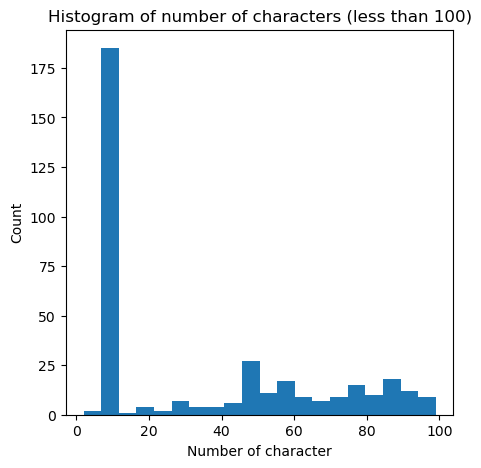

In [22]:
#Exploring number of characters of in a post, with a top limit of 100 characters
plt.figure(figsize=(5,5))
plt.hist(df_combined[df_combined['num_of_char_in_selftext'] < 100]['num_of_char_in_selftext'],bins=20)
plt.title("Histogram of number of characters (less than 100)")
plt.xlabel("Number of character")
plt.ylabel("Count")

Comment: Something is odd for the posts with characters < 20, let's check it out

In [23]:
#Filtering df with characters < 25 and sort it in ascending num of char
df_combined[df_combined['num_of_char_in_selftext'] <= 25].sort_values('num_of_char_in_selftext', ascending=True)

,subreddit,selftext,author_fullname,gilded,title,link_flair_richtext,subreddit_name_prefixed,hidden,pwls,link_flair_css_class,thumbnail_height,top_awarded_type,hide_score,quarantine,link_flair_text_color,upvote_ratio,author_flair_background_color,subreddit_type,total_awards_received,media_embed,thumbnail_width,author_flair_template_id,is_original_content,secure_media,is_reddit_media_domain,is_meta,category,secure_media_embed,link_flair_text,score,is_created_from_ads_ui,author_premium,thumbnail,edited,author_flair_css_class,author_flair_richtext,gildings,content_categories,is_self,link_flair_type,wls,removed_by_category,author_flair_type,domain,allow_live_comments,suggested_sort,view_count,archived,no_follow,is_crosspostable,pinned,over_18,all_awardings,awarders,media_only,can_gild,spoiler,locked,author_flair_text,treatment_tags,removed_by,distinguished,subreddit_id,link_flair_background_color,id,is_robot_indexable,author,discussion_type,num_comments,send_replies,whitelist_status,contest_mode,author_patreon_flair,author_flair_text_color,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video,retrieved_utc,updated_utc,utc_datetime_str,is_gallery,media_metadata,gallery_data,url_overridden_by_dest,post_hint,preview,link_flair_template_id,poll_data,author_cakeday,approved_by,created,downs,likes,mod_reports,num_reports,post_categories,removal_reason,report_reasons,retrieved_on,rte_mode,saved,selftext_html,ups,user_reports,edited_on,crosspost_parent,crosspost_parent_list,previous_visits,brand_safe,date,num_of_char_in_selftext
400,Maplestory,🤡🔨,t2_zo21s,0,Does the NicoNico hammer still exist in reboot?,"[{'e': 'text', 't': 'Literally Unplayable'}]",r/Maplestory,False,6.0,red,NaN,NaN,True,False,light,1.00,None,public,0.0,{},NaN,None,False,None,False,False,NaN,{},Literally Unplayable,1,False,False,self,False,None,[],{},NaN,True,richtext,6.0,None,text,self.Maplestory,False,None,NaN,False,True,True,False,False,[],[],False,True,False,False,None,[],NaN,None,t5_2rrdo,#ea0027,11fxb2k,True,grandecou,NaN,0,True,all_ads,False,False,None,/r/Maplestory/comments/11fxb2k/does_the_niconico_hammer_still_exist_in_reboot/,all_ads,False,https://www.reddit.com/r/Maplestory/comments/11fxb2k/does_the_niconico_hammer_still_exist_in_reboot/,106140.0,1677745139,0,None,False,1677745155,1677745155,2023-03-02 08:18:59,NaN,NaN,NaN,NaN,NaN,NaN,8896927c-b6c9-11e6-914b-0e53646228d0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-02 08:18:59,2
182,Maplestory,title,t2_8khlow52,0,did they remove rose clipping drop from ardentmill?,"[{'e': 'text', 't': 'Question'}]",r/Maplestory,False,6.0,purple,NaN,NaN,True,False,light,1.00,None,public,0.0,{},NaN,None,False,None,False,False,NaN,{},Question,1,False,False,self,False,None,[],{},NaN,True,richtext,6.0,None,text,self.Maplestory,False,None,NaN,False,True,True,False,False,[],[],False,True,False,False,None,[],NaN,None,t5_2rrdo,#cc5289,11n4p1a,True,ricatayakahusta,NaN,0,True,all_ads,False,False,None,/r/Maplestory/comments/11n4p1a/did_they_remove_rose_clipping_drop_from_ardentmill/,all_ads,False,https://www.reddit.com/r/Maplestory/comments/11n4p1a/did_they_remove_rose_clipping_drop_from_ardentmill/,106291.0,1678397998,0,None,False,1678398015,1678398016,2023-03-09 21:39:58,NaN,NaN,NaN,NaN,NaN,NaN,7eacade6-b6c9-11e6-a7f2-0eb3295caa78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-09 21:39:58,5
507,RagnarokOnline,???????,NaN,0,ELI5: Why lots of people are against higher rates but most people encourage using manuals and bubblegums?,[],NaN,False,NaN,None,NaN,NaN,False,NaN,dark,NaN,None,public,NaN,{},NaN,NaN,False,None,False,NaN,NaN,{},None,4,NaN,NaN,self,False,None,[],NaN,NaN,True,text,NaN,NaN,text,self.RagnarokOnline,NaN,new,NaN,False,False,False,False,False,NaN,NaN,False,True,False,False,None,NaN,NaN,None,t5_2sch7,NaN,8d5dm9,NaN,suckmydictation,NaN,14,True,None,False,NaN,None,/r/Ragna

Comment: We can see that many of the post had inflammatory comments or they are removed or deleted

In [24]:
# Filtering dataframe to have character of at least 25
df_combined = df_combined[df_combined['num_of_char_in_selftext'] > 25]

In [25]:
# Create column that combined title and selftext as title may contain good information
df_combined['combined_title_selftext'] = df_combined['title'] + ' ' + df_combined['selftext']

# 4. Exploratory Data Analysis

## Please note that we will clean up data along the way

Text(0, 0.5, 'Subreddit')

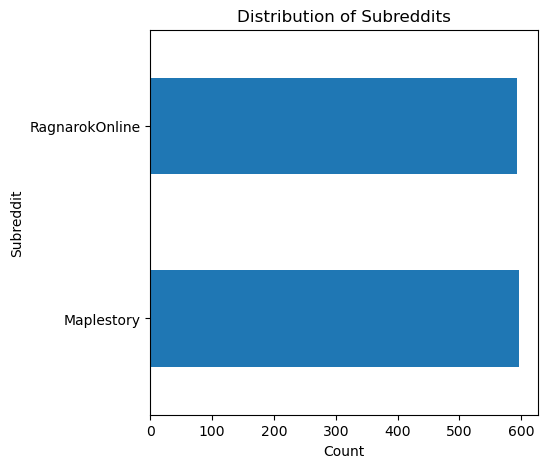

In [26]:
#Checking proportions of subreddit after data cleaning
plt.figure(figsize=(5,5))
df_combined['subreddit'].value_counts().plot(kind='barh')
plt.title("Distribution of Subreddits")
plt.xlabel("Count")
plt.ylabel("Subreddit")

Comment: After data cleaning, the proportions are rather equal

In [27]:
df_combined['num_of_char_in_selftext'].describe()

count     1190.000000
mean       461.627731
std        660.752945
min         27.000000
25%        152.250000
50%        268.500000
75%        514.500000
max      10848.000000
Name: num_of_char_in_selftext, dtype: float64

Comment: We can see that most users type around 300 characters for their post. Let's look at the histogram

Text(0, 0.5, 'Count')

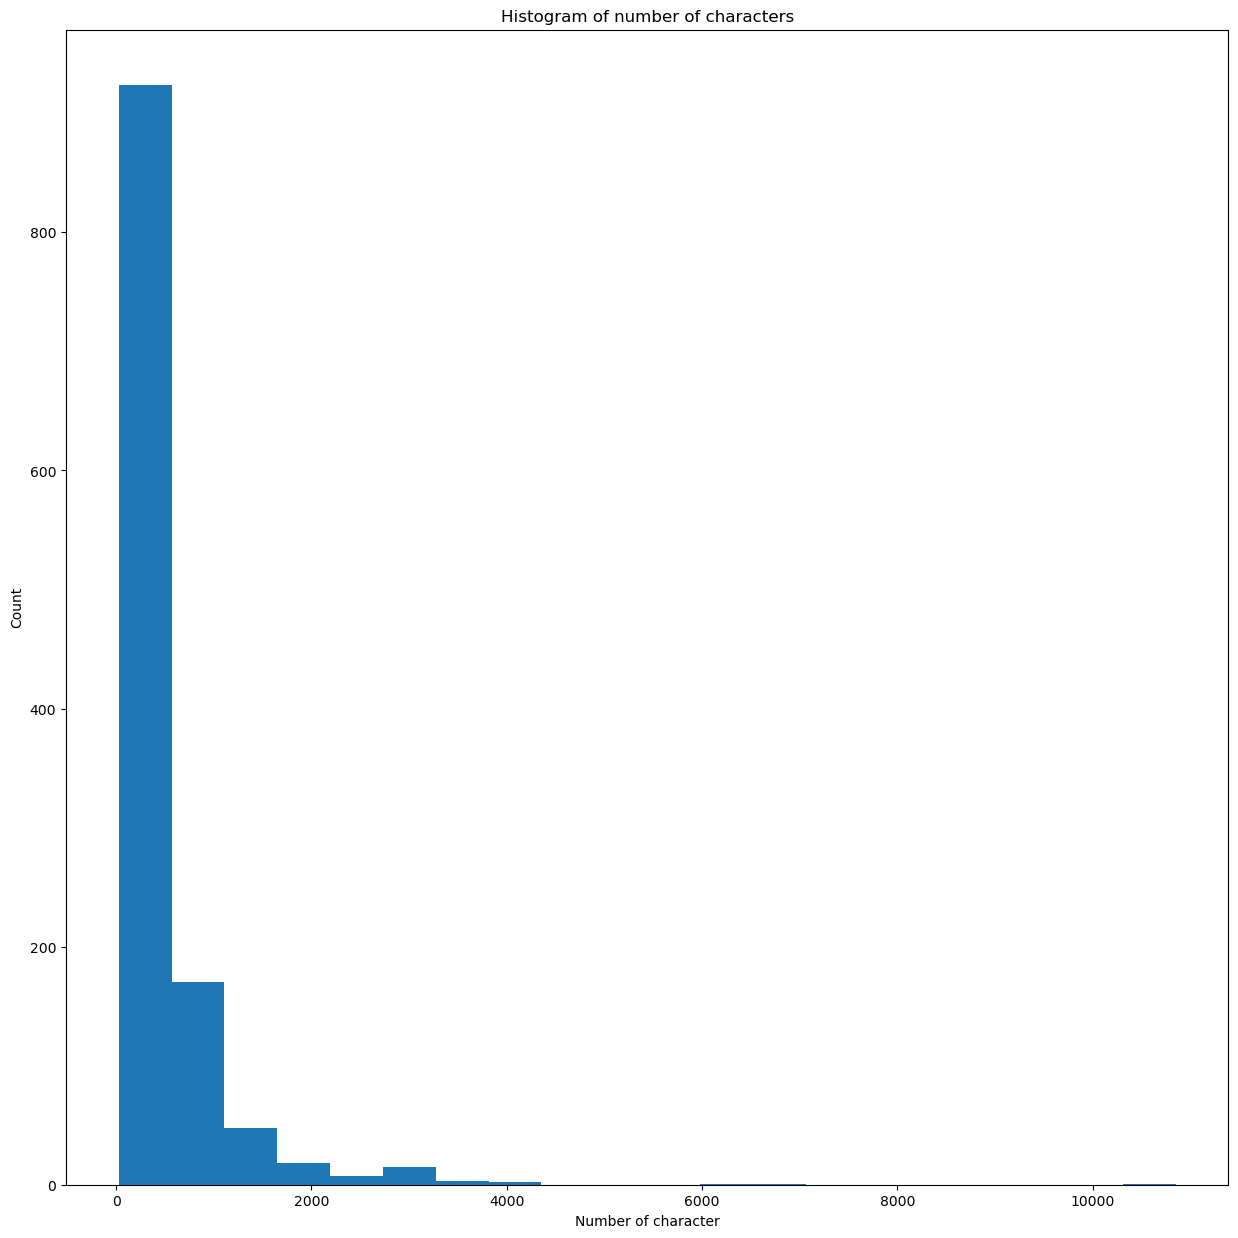

In [28]:
plt.figure(figsize=(15,15))
plt.hist(df_combined['num_of_char_in_selftext'],bins=20)
plt.title("Histogram of number of characters")
plt.xlabel("Number of character")
plt.ylabel("Count")

Comment: This is skewed to the right, let's have a look at the post with more than 2000 characters

In [29]:
df_combined[df_combined['num_of_char_in_selftext'] >= 2000][['selftext', 'num_of_char_in_selftext']].sort_values('num_of_char_in_selftext', ascending=False)

,selftext,num_of_char_in_selftext
567,"For those of you who would rather just browse the site first, here's a link:\n\nhttps://www.asgardlegend.com/ \n\nThere's a bit to read on the main site (especially under job classes), but a lot of links are likely to be missing, and there's no registration or forums, so read on.\n\nI hope this isn't removed for advertisement since *this project isn't open nor is it likely open any time soon, if ever.* I just thought some people would find it interesting to read about since there are so many...",10848
210,Been playing this game on and off for multiple years. started playing again due to seanbobs videos got banned (I think it was a false ban but at this point I've given up getting my account back) and today since Ive been getting burnt out on league I logged into my alt acc that I leveled 3 months ago to 1xx and stopped playing again and that account is also banned! A account I haven't touched in 3 months ago banned. so I thought it would be funny to show my tickets on my old main acc since I ...,6929
610,"Source: \n\n[https://www.youtube.com/watch?v=lIwHa1lWWxc](https://www.youtube.com/watch?v=lIwHa1lWWxc)\n\n[https://www.inven.co.kr/board/maple/2304/33283](https://www.inven.co.kr/board/maple/2304/33283)\n\nI'm still watching the video and typing the script, translating (not google) in English, so will put up here soon. \n\n\n&gt; ●캐릭터성장 \n \n&gt; \n&gt;너무 성장에 드는 노력/시간이 길었음 \n\-&gt; 더욱 빠르고 강하게. 260까지, 성장주기단축. \n260이후, 어센틱과 레벨이 허들이었음. \n이 두가지만 존재하는게 아니라, \n최상위유저의 플레이경험 등은 지키면서 의미있는 성장요...",6004
254,"**TL;DR HWill solo is mechanically much more difficult than HWill in a party, mainly because P3 moonlight generation is extremely scarce. Practice dodging EVERYTHING during your chill party runs, so that it'll be easier when it's time for your cracked solo achievement.** \n\nI made this post because these are a few things I wished I knew when I first started attempting HWill solo. \n\nIt's you, some time ago. Fresh 250, 25k stat, ready for NWill but you've never done it before. Luckily someo...",4276
808,"**Please note:** this 'guide'/help is only for people who want to maximize exp rates... Not meso/familiar/node rates.\n\nIt's been a while since Totems were removed, and with that, the whole 'one map is best' should have went with it... However I see a lot of people haven't actually caught up to that, and religiously stick to one map for 5-10 levels. The common advice is 'run a BA and go with the highest kill rate map that you have access to'... this is actually not true most of the t...",3895
892,"I don't even know what's going on with Jett and if mine is just especially broken...\n\nI started this character a few days ago and I'm confused. Here's what playing Jett is like in 2023:\n\nYou start the story out, blah blah blah, until you reach level 10 and Kyrin tells you that she will expect you to help around the Nautilus. Usually this would mean quests from Nautilus NPCs, right? But no. There's only one quest available and it's level 20+, so for the first time in a very long time in m...",3540
150,"After reading over and over the debates as to the meaning of randomness as used by Nexon, I've written this post with the intention of settling the matter conclusively. The community will probably frustrate my intention, but at least I tried :(\n\nTLDR: If Nexon describes something as random but also specifies that it has unequal probability rates, then this is **not** a contradiction. I get that it's not intuitive to everyone, but that's why it's important to read widely.\n\nAccording to [W...",3499
17,"everything is still in test phases. not conclusion is been make yet.\n\nlink: [https://maplestory.nexon.com/Testworld/Update/482](https://maplestory.nexon.com/Testworld/Update/482) (chrome translate)\n\n**Magnus**\n\n\- When casting a slow debuff, the attack range is adjusted .\n\n\- When casting the undead debuff, the attack range is adjusted .\n\n\- The penalty received outside the zone is change

In [30]:
df_combined[df_combined['num_of_char_in_selftext'] >= 2000].shape

(35, 118)

Comment: Posts with more than 2000 characters are rare, there are only a handful of them

Text(0, 0.5, 'Author')

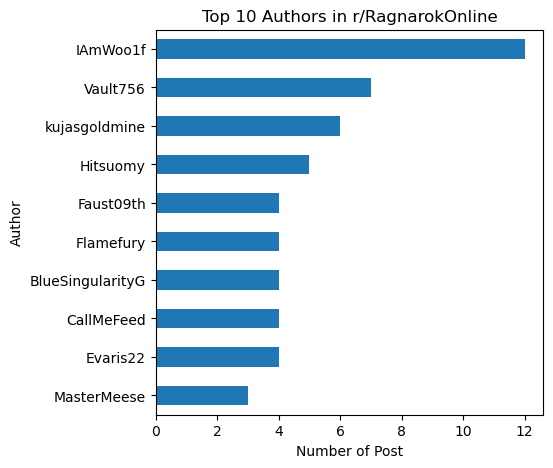

In [31]:
#Checking Top 10 authors in Ragnarok Online
plt.figure(figsize=(5,5))
df_combined[df_combined['subreddit'] == 'RagnarokOnline']['author'].value_counts(ascending=True).tail(10).plot(kind='barh')
plt.title("Top 10 Authors in r/RagnarokOnline")
plt.xlabel("Number of Post")
plt.ylabel("Author")

Comment: r/RagnarokOnline has about 19400 members, it seems that there is a particularly active user

Text(0, 0.5, 'Author')

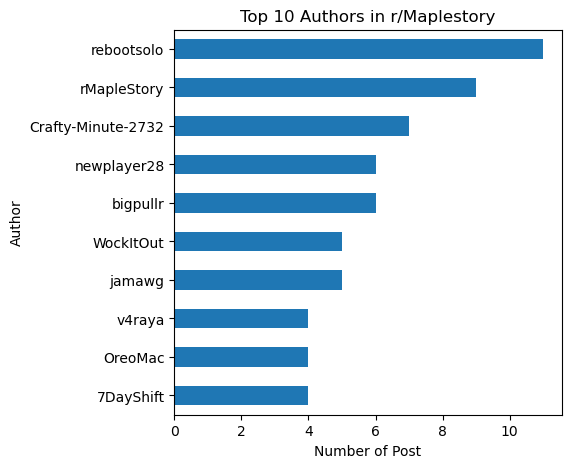

In [32]:
#Checking Top 10 authors in r/Maplestory
plt.figure(figsize=(5,5))
df_combined[df_combined['subreddit'] == 'Maplestory']['author'].value_counts(ascending=True).tail(10).plot(kind='barh')
plt.title("Top 10 Authors in r/Maplestory")
plt.xlabel("Number of Post")
plt.ylabel("Author")

Comment: It seems that while r/Maplestory has 106000 members, the members are not particularly chatty as well. The page administrator is one of the top authors

## 4.1 Most common words

In [33]:
# Creating a countvectoriser to split the text into individual words (without lemmatising)
cvec = CountVectorizer(stop_words="english")

Text(0, 0.5, 'Words')

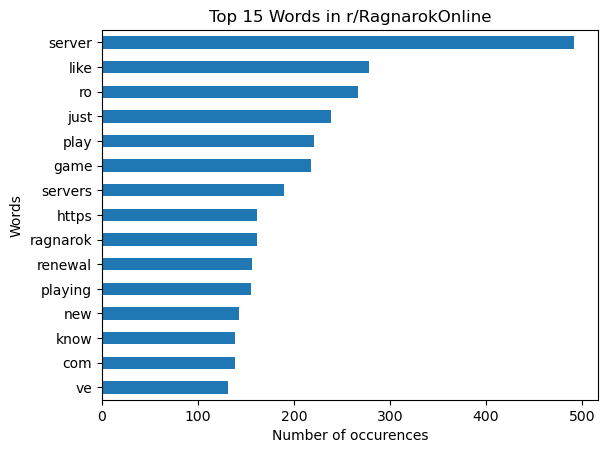

In [34]:
ragnarok_cvec = cvec.fit_transform(df_combined[df_combined["subreddit"] == "RagnarokOnline"]["selftext"])
ragnarok_cvec_df = pd.DataFrame(ragnarok_cvec.todense(), columns =cvec.get_feature_names())
ragnarok_cvec_df.sum().sort_values(ascending=True).tail(15).plot(kind='barh')
plt.title("Top 15 Words in r/RagnarokOnline")
plt.xlabel("Number of occurences")
plt.ylabel("Words")

Text(0, 0.5, 'Words')

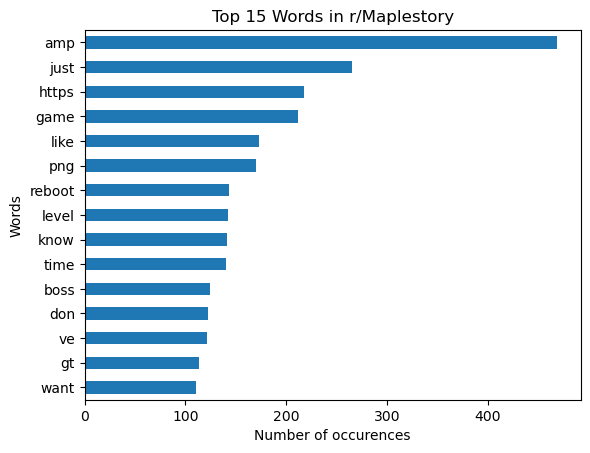

In [35]:
maple_cvec = cvec.fit_transform(df_combined[df_combined["subreddit"] == "Maplestory"]["selftext"])
maple_cvec_df = pd.DataFrame(maple_cvec.todense(), columns =cvec.get_feature_names())
maple_cvec_df.sum().sort_values(ascending=True).tail(15).plot(kind='barh')
plt.title("Top 15 Words in r/Maplestory")
plt.xlabel("Number of occurences")
plt.ylabel("Words")

Comment: Other than "game", "just", "https", "like", there doesn't seem to be words which are common between the discussions of the 2 games. This will potentially make our life easier for the classification. This also means that we do not have to purposely create a special stopword list

Text(0, 0.5, 'Count')

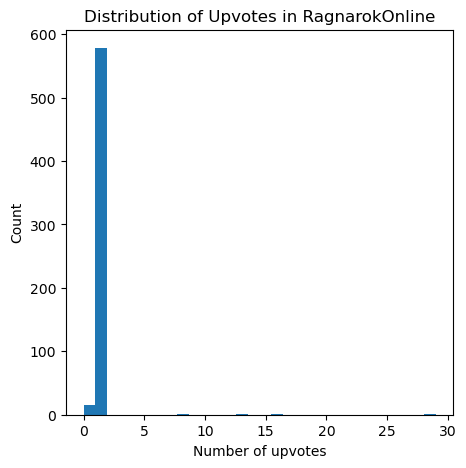

In [36]:
#Checking out distribution of upvotes in MapleStory
plt.figure(figsize=(5,5))
plt.hist(df_combined[df_combined['subreddit']=='Maplestory']['score'],bins=30)
plt.title("Distribution of Upvotes in RagnarokOnline")
plt.xlabel("Number of upvotes")
plt.ylabel("Count")

Comment: It looks like vast majority of the posts only has less than 2 upvotes despite Maplestory being a subreddit with a higher member count

In [37]:
#Checking out the post with the highest upvote
df_combined[df_combined['subreddit']=='Maplestory'][['title','selftext','score']].sort_values('score', ascending=False).head(1)

,title,selftext,score
447,"Remember to take breaks, it's just a game.","After capping clover for 28 days straight, i like to take breaks.",29


Comment: It turnsout it's a self love/care post

Text(0, 0.5, 'Count')

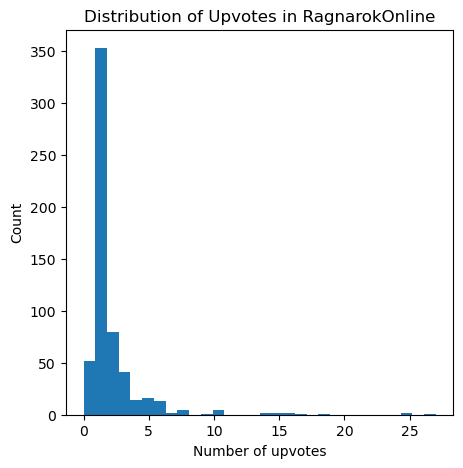

In [38]:
#Checking out distribution of upvotes in RagnarokOnline
plt.figure(figsize=(5,5))
plt.hist(df_combined[df_combined['subreddit']=='RagnarokOnline']['score'],bins=30)
plt.title("Distribution of Upvotes in RagnarokOnline")
plt.xlabel("Number of upvotes")
plt.ylabel("Count")

Comment: The distribution of upvotes in RagnarokOnline is skewed to the right. Despite the lower member count as compared to Maplestory, it seems that RagnarokOnline has a higher participation rate

In [39]:
df_combined[df_combined['subreddit']=='RagnarokOnline'][['title','selftext','score']].sort_values('score', ascending=False).head(1)

,title,selftext,score
622,New player loving the game so far!,"Hi everyone, I’m a new player who’s just joined RO (On the ReSTART server). \n\nI’ve been playing with a few friends who I’ve convinced to sign up and we’re having a blast just exploring and levelling. This game is pretty great and we’re all having a lot of fun just being in its world. \n\nThere’s a lot of people spreading doom &amp; gloom in these threads on this subreddit and on the forums and I don’t see any problems. Maybe that’s just because I’m new and stuff but I haven’t felt any real...",27


Comment: It's a post that shares a review of the game

## 4.2 Tokenising and Lemmatising

In [40]:
# Instantiating tokeniser to tokenise sentences and then lemmatizer to lemmatise words
tokenizer  = RegexpTokenizer(r"(?u)\b\w\w+\b")
lemmatizer = WordNetLemmatizer()

lemmatised_entries = []

for i in df_combined['combined_title_selftext']:
    tokens = tokenizer.tokenize(i)
    i = [lemmatizer.lemmatize(i.lower()) for i in tokens]
    lemmatised_entries.append(" ".join(i))

#Creating a new column for the lemmatised entries
df_combined['lemmatised_entries'] = lemmatised_entries

#Checking on the dataframe to ensure everything works properly
df_combined.head(1)
    


,subreddit,selftext,author_fullname,gilded,title,link_flair_richtext,subreddit_name_prefixed,hidden,pwls,link_flair_css_class,thumbnail_height,top_awarded_type,hide_score,quarantine,link_flair_text_color,upvote_ratio,author_flair_background_color,subreddit_type,total_awards_received,media_embed,thumbnail_width,author_flair_template_id,is_original_content,secure_media,is_reddit_media_domain,is_meta,category,secure_media_embed,link_flair_text,score,is_created_from_ads_ui,author_premium,thumbnail,edited,author_flair_css_class,author_flair_richtext,gildings,content_categories,is_self,link_flair_type,wls,removed_by_category,author_flair_type,domain,allow_live_comments,suggested_sort,view_count,archived,no_follow,is_crosspostable,pinned,over_18,all_awardings,awarders,media_only,can_gild,spoiler,locked,author_flair_text,treatment_tags,removed_by,distinguished,subreddit_id,link_flair_background_color,id,is_robot_indexable,author,discussion_type,num_comments,send_replies,whitelist_status,contest_mode,author_patreon_flair,author_flair_text_color,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video,retrieved_utc,updated_utc,utc_datetime_str,is_gallery,media_metadata,gallery_data,url_overridden_by_dest,post_hint,preview,link_flair_template_id,poll_data,author_cakeday,approved_by,created,downs,likes,mod_reports,num_reports,post_categories,removal_reason,report_reasons,retrieved_on,rte_mode,saved,selftext_html,ups,user_reports,edited_on,crosspost_parent,crosspost_parent_list,previous_visits,brand_safe,date,num_of_char_in_selftext,combined_title_selftext,lemmatised_entries
0,RagnarokOnline,Hi I play on iRO Chaos currently at lvl 96 and jlvl 50 Knight levelling has hit a bit of a crawl mobs tend to be too difficult for me im a non-VIP player. and newbie only have enough zeny for transcend and some supplies for levelling. any advice on where best to go i've been trying to look up some guides but only map recommendations came up.,t2_cqqjobyk,0,Need some Help.,[],r/RagnarokOnline,False,6.0,None,NaN,NaN,True,False,dark,1.0,None,public,0.0,{},NaN,NaN,False,None,False,False,NaN,{},None,1,False,False,self,False,None,[],{},NaN,True,text,6.0,None,text,self.RagnarokOnline,False,None,NaN,False,True,True,False,False,[],[],False,True,False,False,None,[],NaN,None,t5_2sch7,,11sjvmy,True,No-Committee3093,NaN,0,True,all_ads,False,False,None,/r/RagnarokOnline/comments/11sjvmy/need_some_help/,all_ads,False,https://www.reddit.com/r/RagnarokOnline/comments/11sjvmy/need_some_help/,19424.0,1678940238,0,None,False,1678940248,1678940249,2023-03-16 04:17:18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-16 04:17:18,343,Need some Help. Hi I play on iRO Chaos currently at lvl 96 and jlvl 50 Knight levelling has hit a bit of a crawl mobs tend to be too difficult for me im a non-VIP player. and newbie only have enough zeny for transcend and some supplies for levelling. any advice on where best to go i've been trying to look up some guides but only map recommendations came up.,need some help hi play on iro chaos currently at lvl 96 and jlvl 50 knight levelling ha hit bit of crawl mob tend to be too difficult for me im non vip player and newbie only have enough zeny for transcend and some supply for levelling any advice on where best to go ve been trying to look up some guide but only map recommendation came up


In [41]:
df_for_analysis = df_combined[['lemmatised_entries', 'subreddit']]

In [42]:
df_for_analysis.head()

,lemmatised_entries,subreddit
0,need some help hi play on iro chaos currently at lvl 96 and jlvl 50 knight levelling ha hit bit of crawl mob tend to be too difficult for me im non vip player and newbie only have enough zeny for transcend and some supply for levelling any advice on where best to go ve been trying to look up some guide but only map recommendation came up,RagnarokOnline
1,heard asgard legend server is reopening it server read about this before can anyone confirm if it true,RagnarokOnline
4,what make good ragnarok online stream hey all looking to learn about what make good stream for ragnarok online if you could please share some good experience you ve had with streamer before it would be highly appreciated but want to include a many people from the community a possible so for those who have never watched ro streamer have special question for you do you believe the in game sound music should be enabled during stream are there any map mob skill that you can to listen to ________...,RagnarokOnline
6,is there too much gatekeeping by rathena community feel like the rathena community doe the bare minimum to help people limited and near abandoned wiki every google result lead to some decade old forum post with people often telling the op to search more asking for help in the discord chat is dead silence and then you get pm over the next few hour of random people offering to help you for payment between 10 100 per hour how did it get this bad do you guy have any optimism for this community,RagnarokOnline
7,looking for duo trio experience in ro classic looking for duo trio experience in ro classic guess but have only few week story with this game interested in low rate server but dont wanna always look for random party wanna try something like autocast sage mb or combomonk or not greemtooth assasin,RagnarokOnline


In [43]:
df_for_analysis.to_csv("../dataset/analysis.csv", index=False)

## The preprocessing, modelling, and conclusions will be continued in Part 2 of 2